# Financial Anlaysis on Historical Data

#### This guided project is basically a copy of my assignment done on Coursera.
#### You can avail the course at the following link : https://www.coursera.org/learn/python-project-for-data-science.

# Required Libraries 
#### yfinance
#### pandas
#### matplotlib
#### requests
#### bs4
#### warnings

In [1]:
# Importing the required libraries
import yfinance as yf
import pandas as pd
import requests as r
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore" , category = FutureWarning)

### We will extract stock data of TESLA and GAMESTOP.
##### We will scrap revenue as well as stocks/shares data for both companies


# TESLA Stock data

In [2]:
tesla_stock = yf.Ticker("TSLA")
tesla_data = tesla_stock.history(period = "max")
tesla_data.reset_index(inplace = True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


#### We made a ticker object and extracted data using the **yfinance** library
# TESLA Revenue Data

In [4]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
html_data = r.get(url).text
tesla_revenue_data = BeautifulSoup(html_data, 'html.parser')
tesla_revenue = pd.DataFrame(columns=['Date', 'Revenue'])
table = tesla_revenue_data.find_all('tbody')[1]

for rows in table.find_all('tr'):
    columns = rows.find_all('td')
    date = columns[0].text
    revenue = columns[1].text
    tesla_revenue = tesla_revenue._append({'Date' : date, 'Revenue' : revenue}, ignore_index = True)

tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"", regex=True)
tesla_revenue.dropna(inplace=True)
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

tesla_revenue.tail()

<>:13: SyntaxWarning: invalid escape sequence '\$'
<>:13: SyntaxWarning: invalid escape sequence '\$'
/tmp/ipykernel_5628/2536939231.py:13: SyntaxWarning: invalid escape sequence '\$'
  tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"", regex=True)


,Date,Revenue
48,2010-09-30,31
49,2010-06-30,28
50,2010-03-31,21
52,2009-09-30,46
53,2009-06-30,27


#### We used ***BeautifulSoup*** to extract the html code and on that code we separated the table and got our data from the desired table
# GAMESTOP Stock Data

In [5]:
game_stop_ticker = yf.Ticker("GME")
gme_data =  game_stop_ticker.history(period = "max")
gme_data.reset_index(inplace =True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716073,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683251,1.687459,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


#### The same method was applied to extract gamestop's stock data
# GAMESTOP Revenue Data

In [6]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
gme_html_code = r.get(url).text
data = BeautifulSoup(gme_html_code, 'html.parser')
gme_revenue = pd.DataFrame(columns=['Date', 'Revenue'])
table = data.find_all('tbody')[1]
for rows in table.find_all('tr'):
    
    column = rows.find_all('td')
    date = column[0].text
    revenue = column[1].text
    gme_revenue = gme_revenue._append({'Date' : date, 'Revenue' : revenue}, ignore_index=True)

gme_revenue['Revenue'] = gme_revenue['Revenue'].str.replace(',|\$', "", regex = True)
gme_revenue.dropna(inplace = True)
gme_revenue = gme_revenue[gme_revenue['Revenue'] != ""]

gme_revenue.tail()

<>:13: SyntaxWarning: invalid escape sequence '\$'
<>:13: SyntaxWarning: invalid escape sequence '\$'
/tmp/ipykernel_5628/2900638712.py:13: SyntaxWarning: invalid escape sequence '\$'
  gme_revenue['Revenue'] = gme_revenue['Revenue'].str.replace(',|\$', "", regex = True)


,Date,Revenue
57,2006-01-31,1667
58,2005-10-31,534
59,2005-07-31,416
60,2005-04-30,475
61,2005-01-31,709


#### We now have our hands on both stock and revnue data for 2 companies. We will begin to plot them

In [14]:
def make_graph(stock_data, revenue_data, stock):
    # Convert Date columns to datetime and remove timezone info
    stock_data['Date'] = pd.to_datetime(stock_data['Date']).dt.tz_localize(None)
    revenue_data['Date'] = pd.to_datetime(revenue_data['Date'])
    
    # Filter the data
    stock_data_specific = stock_data[stock_data['Date'] <= '2021-06-14']
    revenue_data_specific = revenue_data[revenue_data['Date'] <= '2021-04-30']
    
    # Ensure the columns are numeric
    stock_data_specific['Close'] = pd.to_numeric(stock_data_specific['Close'], errors='coerce')
    revenue_data_specific['Revenue'] = pd.to_numeric(revenue_data_specific['Revenue'], errors='coerce')
    
    # Create the plot
    fig, ax = plt.subplots(2, 1, figsize=(10, 8), sharex=True)
    
    # Plot historical share price
    ax[0].plot(stock_data_specific['Date'], stock_data_specific['Close'], label='Share Price', color='blue')
    ax[0].set_title('Historical Share Price')
    ax[0].set_ylabel('Price ($US)')
    ax[0].legend()
    
    # Plot historical revenue
    ax[1].plot(revenue_data_specific['Date'], revenue_data_specific['Revenue'], label='Revenue', color='green')
    ax[1].set_title('Historical Revenue')
    ax[1].set_ylabel('Revenue ($US Millions)')
    ax[1].set_xlabel('Date')
    ax[1].legend()
    
    # Set the main title
    fig.suptitle(stock, fontsize=16)
    
    # Show the plot
    plt.show()


### We will call the function to view the time series analysis for both revenue and stock data for TESLA.

/tmp/ipykernel_5628/3224711078.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data_specific['Close'] = pd.to_numeric(stock_data_specific['Close'], errors='coerce')
/tmp/ipykernel_5628/3224711078.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  revenue_data_specific['Revenue'] = pd.to_numeric(revenue_data_specific['Revenue'], errors='coerce')


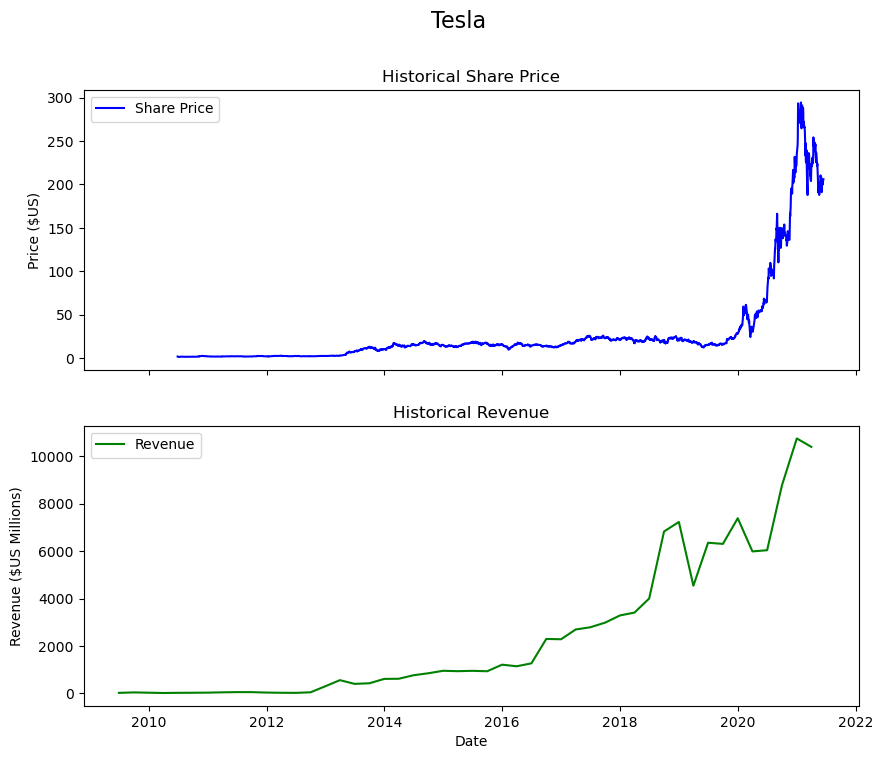

In [15]:
make_graph(tesla_data, tesla_revenue, 'Tesla')

### Similarly, We will go for GameStop's time series analysis.

/tmp/ipykernel_5628/3224711078.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data_specific['Close'] = pd.to_numeric(stock_data_specific['Close'], errors='coerce')


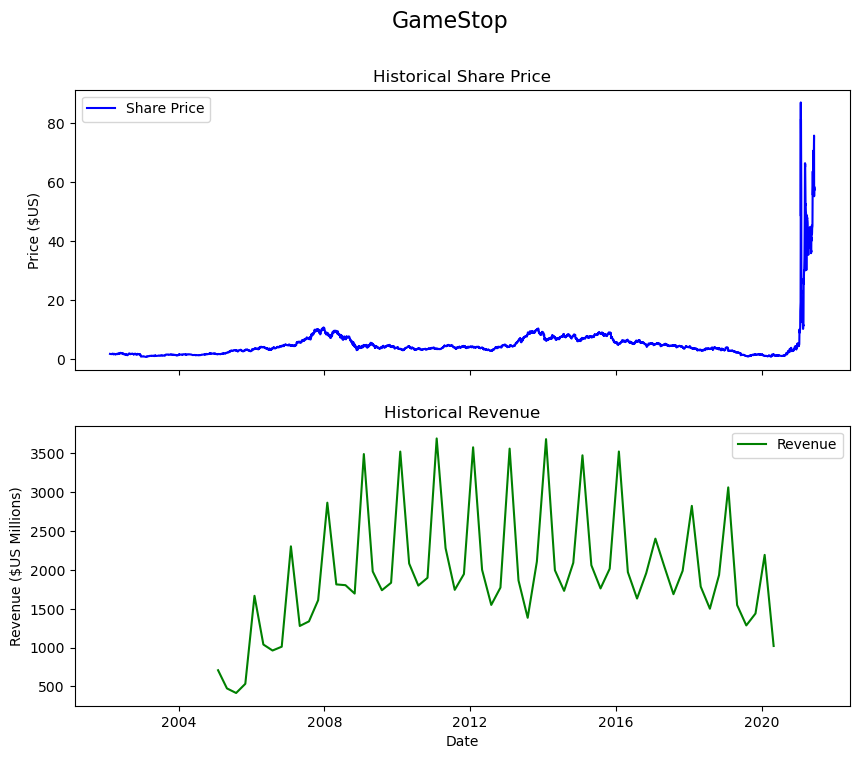

In [16]:
make_graph(gme_data, gme_revenue, 'GameStop')